In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.utils.impute.pipeline import rooms, bedrooms

In [13]:
df_train = pd.read_parquet("../data/interim/df_train.parquet", engine="pyarrow")
df_test = pd.read_parquet("../data/interim/df_test.parquet", engine="pyarrow")

In [14]:
df_train.isna().sum().sort_values(ascending=False)

ad_type                                0
published_suburb_Godoy Cruz            0
published_suburb_General Levalle       0
published_suburb_General Paz           0
published_suburb_General San Martín    0
                                      ..
suburb_Rafaela                         0
suburb_Recoleta                        0
suburb_República de la Sexta           0
suburb_Resistencia                     0
price                                  0
Length: 612, dtype: int64

In [15]:
df_test.isna().sum().sort_values(ascending=False)

NameError: name 'ljkm' is not defined

In [9]:
# df_train = df_train.drop_duplicates(keep='last')
df_train = df_train[df_train['suburb'].isin(df_test["suburb"].unique().tolist())]

KeyError: 'suburb'

In [10]:
df_train.isna().sum()

ad_type                    0
lat                        0
lon                        0
rooms                      0
bedrooms                   0
                          ..
published_suburb_Wilde     0
published_suburb_Zona 3    0
published_suburb_Zona 9    0
published_suburb_Águila    0
price                      0
Length: 612, dtype: int64

,ad_type,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,operation_type,...,published_suburb_Villa Satyta,published_suburb_Villa Soldati,published_suburb_Villa Urquiza,published_suburb_Villa Vatteone,published_suburb_Villa del Parque,published_suburb_Wilde,published_suburb_Zona 3,published_suburb_Zona 9,published_suburb_Águila,price
id,,,,,,,,,,,,,,,,,,,,,
5,0.0,-34.663334,-58.486344,3.0,2.666667,1.333333,87.0,87.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0
98,0.0,-34.603990,-58.412370,1.0,1.000000,1.000000,28.0,28.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98000.0
100,0.0,-34.691785,-58.406821,1.0,1.000000,1.000000,36.0,36.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67000.0
101,0.0,-34.553008,-58.457528,3.0,2.000000,2.000000,74.0,74.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335000.0
103,0.0,-34.603990,-58.412370,1.0,1.000000,1.000000,28.0,28.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999903,0.0,-34.595001,-58.382999,4.0,3.000000,4.000000,153.0,153.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335000.0
999953,0.0,-34.589703,-58.389826,4.0,3.000000,5.000000,153.0,153.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550000.0
999954,0.0,-34.594358,-58.397430,5.0,5.000000,5.000000,436.0,418.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,950000.0


In [119]:
df_train["rooms"] = df_train["rooms"].fillna(df_train.groupby("suburb")["rooms"].transform("median"))
df_train["bedrooms"] = df_train["bedrooms"].fillna(df_train.groupby("suburb")["bedrooms"].transform("median"))

df_train = df_train[df_train["rooms"] <= df_test["rooms"].max()]
df_train = df_train[df_train["bedrooms"] <= df_test["bedrooms"].max()]

In [121]:
df_train.isna().sum().sort_values(ascending=False)

surface_covered      2903
surface_total        2903
bathrooms             860
ad_type                 0
operation_type          0
property_type           0
description             0
title                   0
currency                0
price                   0
id                      0
bedrooms                0
rooms                   0
published_suburb        0
suburb                  0
province                0
country                 0
lon                     0
lat                     0
dist_buenos_aires       0
dtype: int64

In [122]:
df_test.isna().sum().sort_values(ascending=False)

price                6000
id                      0
ad_type                 0
operation_type          0
property_type           0
description             0
title                   0
currency                0
surface_covered         0
surface_total           0
bathrooms               0
bedrooms                0
rooms                   0
published_suburb        0
suburb                  0
province                0
country                 0
lon                     0
lat                     0
dist_buenos_aires       0
dtype: int64

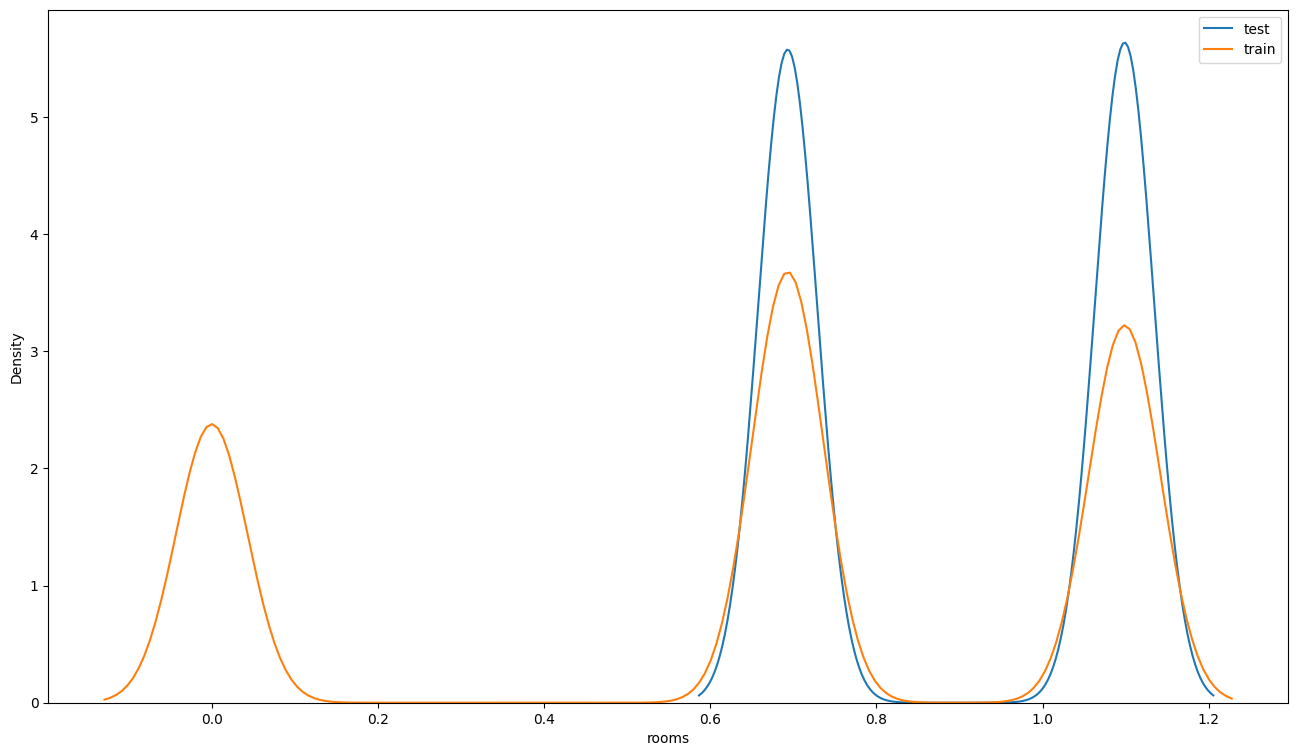

In [105]:
plt.figure(figsize=(16,9))

sns.kdeplot(x=np.log(df_test["rooms"]), label="test")
sns.kdeplot(x=np.log(df_train["rooms"]), label="train")
# sns.kdeplot(x=df_train["rooms"].fillna(-1), label="train_nolog")
plt.legend()
plt.show()

In [106]:
df_test["bedrooms"].value_counts()

bedrooms
1.0    3024
2.0    2948
3.0      26
5.0       1
4.0       1
Name: count, dtype: int64

/Users/uribe/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


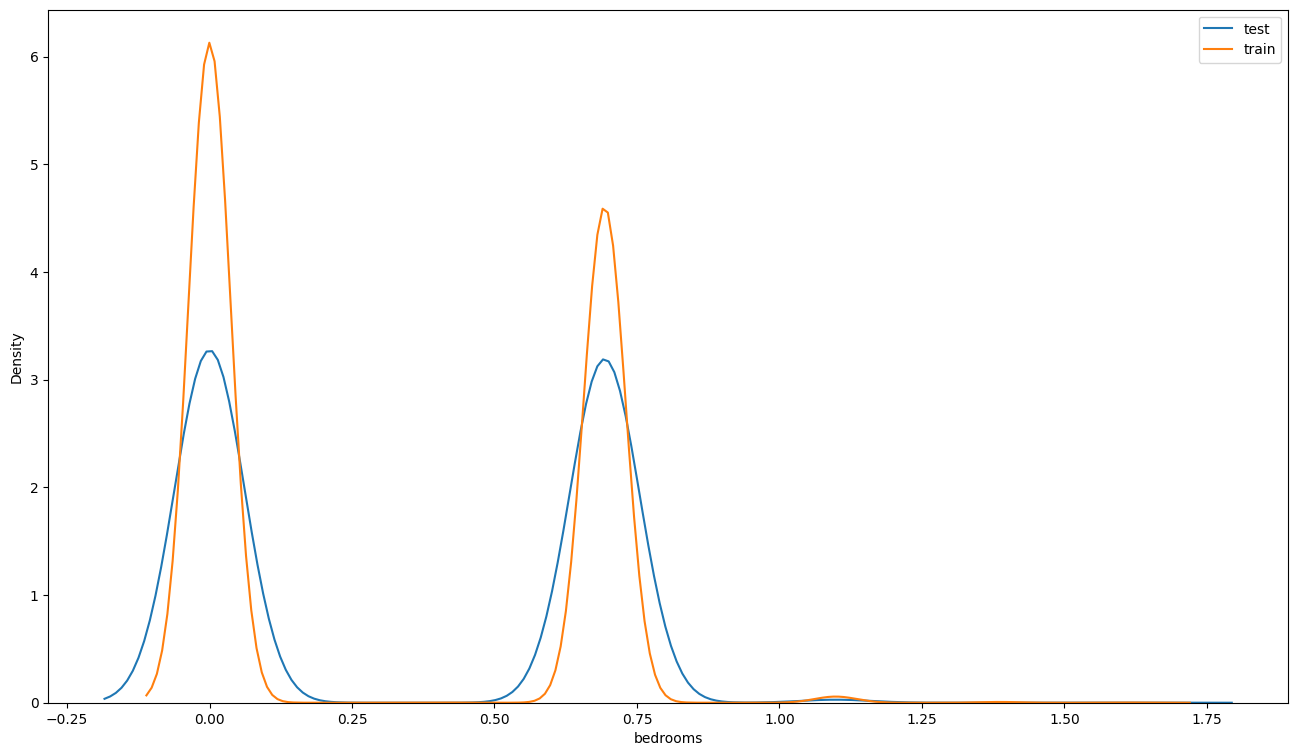

In [107]:
plt.figure(figsize=(16,9))

sns.kdeplot(x=np.log(df_test["bedrooms"]), label="test")
sns.kdeplot(x=np.log(df_train["bedrooms"]), label="train")
# sns.kdeplot(x=df_train["rooms"].fillna(-1), label="train_nolog")
plt.legend()
plt.show()

In [110]:
df_train.isna().sum().sort_values(ascending=False)

surface_covered      2903
surface_total        2903
bathrooms             860
ad_type                 0
operation_type          0
property_type           0
description             0
title                   0
currency                0
price                   0
id                      0
bedrooms                0
rooms                   0
published_suburb        0
suburb                  0
province                0
country                 0
lon                     0
lat                     0
dist_buenos_aires       0
dtype: int64

In [128]:
corr = df_test.drop(["suburb", "property_type", "ad_type", "province", "currency", "price", "published_suburb","country", "title", "description", "operation_type"],axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,id,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,dist_buenos_aires
id,nan,nan,nan,nan,nan,nan,nan,nan,nan
lat,-0.02,nan,nan,nan,nan,nan,nan,nan,nan
lon,-0.01,1.00,nan,nan,nan,nan,nan,nan,nan
rooms,0.00,0.01,0.01,nan,nan,nan,nan,nan,nan
bedrooms,0.01,0.01,0.01,0.96,nan,nan,nan,nan,nan
bathrooms,0.02,0.03,0.03,0.29,0.29,nan,nan,nan,nan
surface_total,-0.02,-0.00,-0.01,0.04,0.03,0.00,nan,nan,nan
surface_covered,-0.02,-0.00,-0.01,0.04,0.03,0.01,0.97,nan,nan
dist_buenos_aires,-0.01,1.00,1.00,0.01,0.01,0.03,-0.00,-0.00,nan


In [171]:
from sklearn.decomposition import PCA

In [172]:
pca = PCA()

In [173]:
df = df_test.drop(["suburb", "property_type", "ad_type", "province", "currency", "price", "published_suburb","country", "title", "description", "operation_type"],axis=1)

In [174]:
pcas = pca.fit_transform(df)

In [175]:
pcas

array([[ 9.59106076e+04, -3.54506001e+02, -1.88191934e-01, ...,
         3.58755053e-01, -3.83443493e-02, -8.57559371e-03],
       [-2.67890389e+05, -3.85252238e+02, -3.57935129e+01, ...,
         3.67835658e-01,  1.72710098e-03, -8.50817507e-03],
       [-2.22578389e+05, -3.77338192e+02, -5.33395081e+01, ...,
         1.79162416e-02, -3.75474011e-02,  1.24034286e-02],
       ...,
       [-3.80754389e+05, -3.94390575e+02, -4.23207668e+01, ...,
         3.71055180e-01,  1.08817340e-02, -8.34732908e-03],
       [ 6.26466081e+04, -3.56407972e+02, -7.57224138e+00, ...,
        -5.54984186e-01, -4.70085331e-03, -5.92483072e-03],
       [ 2.96511608e+05, -3.37256356e+02, -1.28223536e+01, ...,
         9.14247457e-01,  2.37359346e-03,  4.92027324e-03]])

<Axes: >

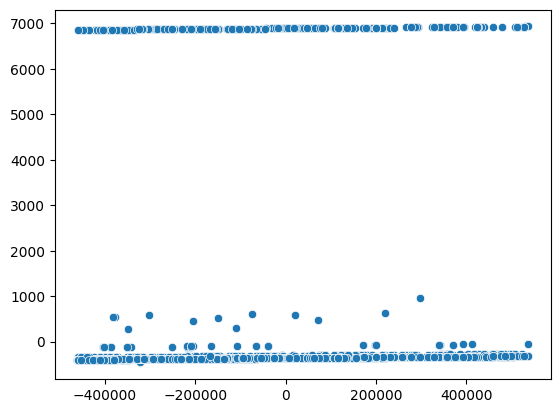

In [176]:
sns.scatterplot(x=pcas[:,0], y=pcas[:,1])

In [177]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [178]:
kmeans = KMeans()

In [179]:
max_clusters = 10
results = []

for n_clusters in range(1, max_clusters + 1):
   # Perform K-means clustering
   kmeans = KMeans(n_clusters=n_clusters)
   kmeans.fit(pcas)

   # Calculate the inertia (sum of squared distances to the nearest centroid)
   inertia = kmeans.inertia_

   # Append the results to the list
   results.append(inertia)

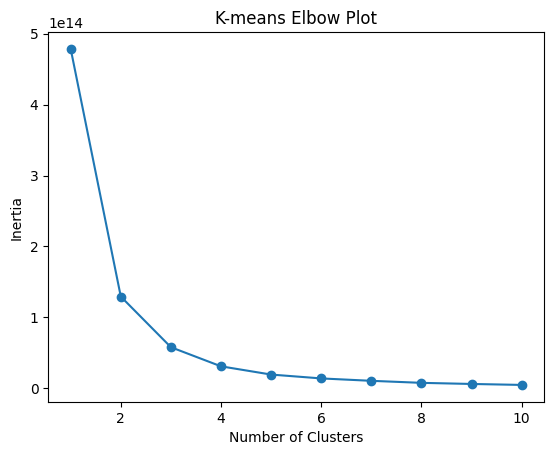

In [180]:
plt.plot(range(1, max_clusters+1), results, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('K-means Elbow Plot')
plt.show()

In [181]:
kl = KneeLocator(range(1, max_clusters + 1), results, curve="convex", direction="decreasing")
optimal_clusters = kl.elbow

In [182]:
optimal_clusters

3

In [183]:
kmeans = KMeans(n_clusters=optimal_clusters)

In [184]:
kmeans.fit(df)
labels = kmeans.predict(df)

<Axes: >

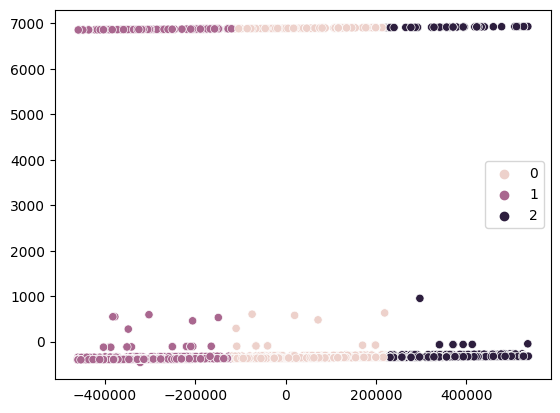

In [185]:
sns.scatterplot(x=pcas[:,0], y=pcas[:,1], hue=labels)

In [187]:
df_train.isna().sum().sort_values(ascending=False)

surface_covered      2903
surface_total        2903
bathrooms             860
ad_type                 0
operation_type          0
property_type           0
description             0
title                   0
currency                0
price                   0
id                      0
bedrooms                0
rooms                   0
published_suburb        0
suburb                  0
province                0
country                 0
lon                     0
lat                     0
dist_buenos_aires       0
dtype: int64

In [193]:
def drop_correlated_columns(data, threshold):
    corr_matrix = data.corr().abs()  # Compute the absolute correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape, dtype=np.bool_), k=1))  # Select upper triangle of correlation matrix
    correlated_columns = [column for column in upper.columns if any(upper[column] > threshold)]

    data_dropped = data.drop(correlated_columns, axis=1)  # Drop correlated columns

    return data_dropped

In [513]:
df_train = pd.read_parquet("../data/interim/df_train.parquet", engine="pyarrow")
df_test = pd.read_parquet("../data/interim/df_test.parquet", engine="pyarrow")

In [514]:
extra_cols = ["id", "lat", "lon", "dist_buenos_aires", "surface_total", "surface_covered"]

In [515]:
df_train = df_train.drop(["suburb", "property_type", "ad_type", "province", "currency", "price", "published_suburb","country", "title", "description", "operation_type"] + extra_cols,axis=1)

df_test = df_test.drop(["suburb", "property_type", "ad_type", "province", "currency", "price", "published_suburb","country", "title", "description", "operation_type"] + extra_cols,axis=1)

In [516]:
df_train = drop_correlated_columns(df_train, 0.7)
df_test = drop_correlated_columns(df_test, 0.7)

In [517]:
df_train["price"] = 0
df_test["price"] = 1

In [518]:
df_test

,rooms,bathrooms,price
0,3.0,2.0,1
1,3.0,2.0,1
2,2.0,1.0,1
3,2.0,1.0,1
4,3.0,1.0,1
...,...,...,...
5995,3.0,2.0,1
5996,2.0,1.0,1
5997,3.0,2.0,1
5998,3.0,1.0,1


In [519]:
df_train.isna().sum().sort_values(ascending=False)

df_train["rooms"] = df_train["rooms"].fillna(df_test["rooms"].median())
# df_train["surface_total"] = df_train["surface_total"].fillna(df_test["surface_total"].median())
df_train["bathrooms"] = df_train["bathrooms"].fillna(df_test["bathrooms"].median())
# df_train["surface_covered"] = df_train["surface_covered"].fillna(df_test["surface_covered"].median())


In [520]:
from sklearn.ensemble import RandomForestClassifier

In [521]:
rf = RandomForestClassifier(n_jobs=-1)

In [522]:
df = pd.concat([df_train, df_test])

In [523]:
df.isna().sum().sort_values(ascending=False)

rooms        0
bathrooms    0
price        0
dtype: int64

In [524]:
rf.fit(df.drop("price", axis=1), df["price"])

RandomForestClassifier(n_jobs=-1)

In [525]:
from sklearn.metrics import roc_curve, roc_auc_score


def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [526]:
y_scores = rf.predict_proba(df.drop("price", axis=1))[:, 1]

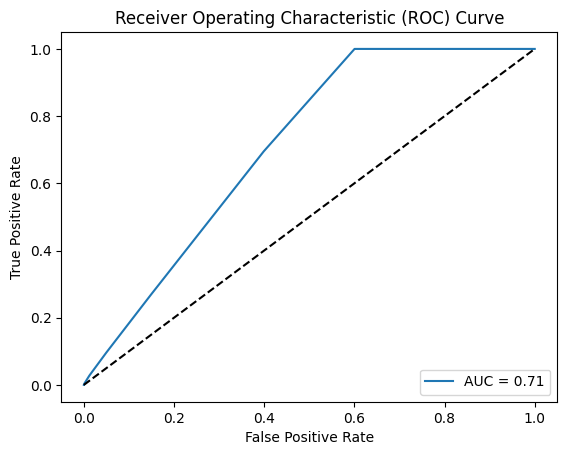

In [527]:
plot_roc_curve(df["price"].values, y_scores)

In [528]:
importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': df.drop(["price"],axis=1).columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False).reset_index(drop=True)

In [529]:
feature_importances_df.sort_values("Importance", ascending=False)

,Feature,Importance
0,rooms,0.934736
1,bathrooms,0.065264
